In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
%matplotlib inline

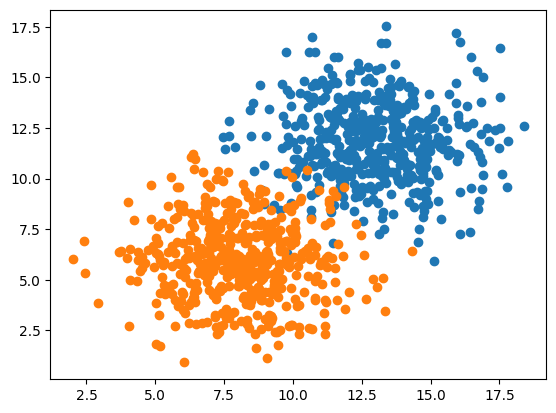

In [8]:
# number of points
n_pts = 500
# random number from seed 0 to have the same random numbers each run
np.random.seed(0)
# declare top and bottom points with randon normal
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
# merge all points in X
X = np.vstack((Xa, Xb))
# declare label array for points
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
# draw top and bottom points in different colors
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [9]:
# choose the sequential model for our training. it's a linear model
model = Sequential()
# add dense parameters to the function
# units: label values, here it's 1 as binary
# input_shape: (2,) for x1 and x2
# activation function name, here it's sigmoid
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
# declare adam method with learnin rate 1. it's a stochastic gradient descent method
adam = Adam(learning_rate=0.1)
# compile the model with adam algorithm
# loss: error function, here it's binary cross entropy
# metrics: what do we want to show in the process of learning, here merely accuracy
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
# declare h for storing the history of the process of model fitting
# fit the model to our data X and Y
# verbose: show the progress bar for each time we review the whole data
# batch_size: divide the data into smaller groups in order to increase speed, shouldn't be too high because it may result in generalization on training data
# epochs: number of iterations over the training data, shouldn't be too high due to the generalization
# shuffle: set true to avoid stucking in local minimums
h = model.fit(x=X, y=Y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4541 - loss: 2.1234  
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4962 - loss: 1.0202 
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8992 - loss: 0.4155 
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8917 - loss: 0.3462
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.9236 - loss: 0.2987
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9568 - loss: 0.2509
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.2342 
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9632 - loss: 0.2131 
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9558 - loss: 0.1899 
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9693 - loss: 0.1768 
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9712 - loss: 0.1588 
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1000

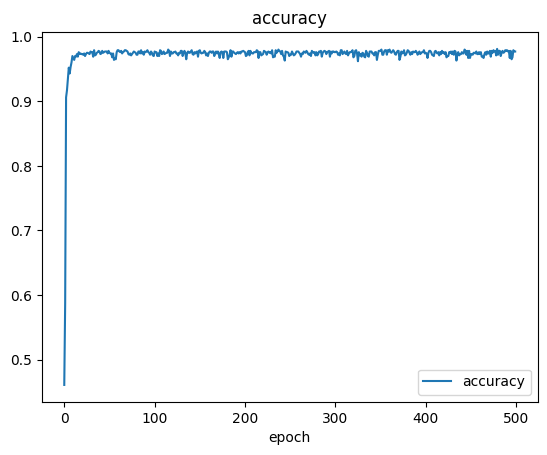

In [10]:
# plot the accuracy during epochs
# plot the history of process
plt.plot(h.history['accuracy'])
# name the title of the plot
plt.title('accuracy')
# name the x coordinate
plt.xlabel('epoch')
# name the line
plt.legend(['accuracy'])

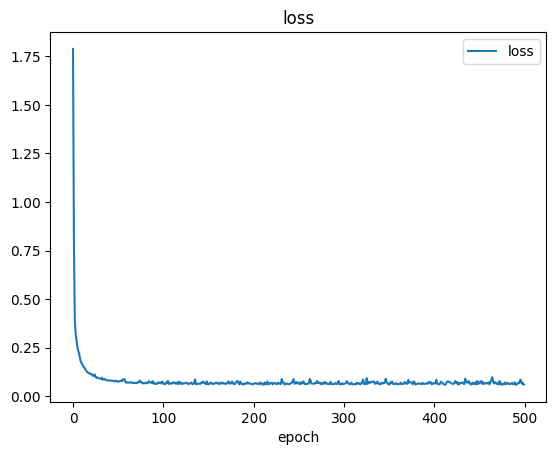

In [11]:
# plot the loss during epochs
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [12]:
# plot the contourf using points, labels and model
def plot_decision_boundary(X, y, model):
  # create the span of x and y values: [min - 1, max + 1]
  # the default length of the span is 50
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
  # create the 50x50 matrix for xs and ys
  # xx: [
  #   [x1, x2, ...]
  #   ...
  #   [x1, x2, ...]
  # ]
  # yy: [
  #   [y1, y1, ...]
  #   ...
  #   [y50, y50, ...]
  # ]
  xx, yy = np.meshgrid(x_span, y_span)
  # reshape the xx and yy into 1D
  xx_, yy_ = xx.ravel(), yy.ravel()
  # merge xx_ and yy_ column-wise
  grid = np.c_[xx_, yy_]
  # predict model using the grid
  predict_function = model.predict(grid)
  # reshape the z into xx shape, that is 50x50 to create the grids on the contourf
  z = predict_function.reshape(xx.shape)
  # plot the contourf
  plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


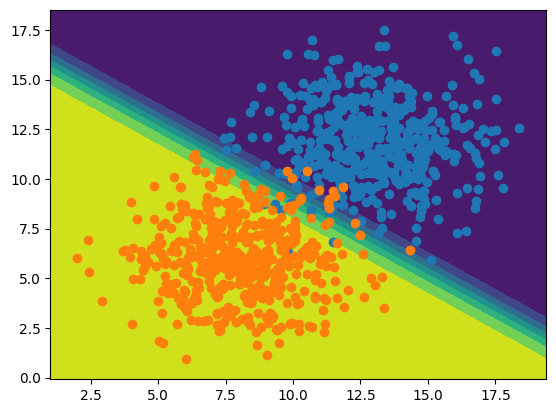

In [13]:
# plot the contourf using points, labels and model
plot_decision_boundary(X, Y, model)
# draw top and bottom points in different colors
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction is: [[0.99999034]]


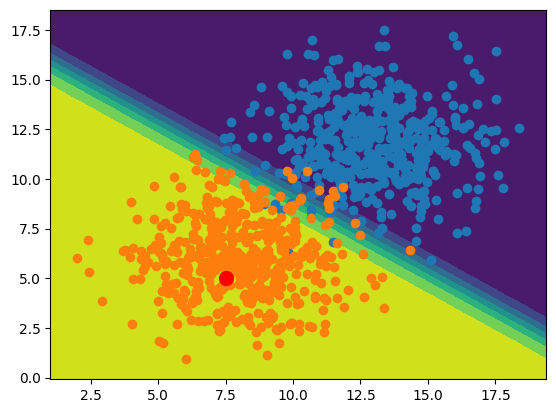

In [14]:
# plot the contourf using points, labels and model
plot_decision_boundary(X, Y, model)
# draw top and bottom points in different colors
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
# declare a point to test the prediction
x, y = 7.5, 5
point = np.array([[x, y]])
# store the prediction
prediction = model.predict(point)
# plot the point in a red circle, size 10 and output the prediction
plt.plot([x], [y], marker='o', markersize=10, color='red')
print(f'Prediction is: {prediction}')